In [1]:
from typing import Callable, List, Tuple

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

from simulated_annealing.algorithm import simple_simulated_annealing
from simulated_annealing.experiment_utils import shape_progress, shuffle
from simulated_annealing.tsp_neighbors import generate_2opt_neighbor, generate_2swap_neighbor

REPS = 100
SEEDS = np.random.randint(200, size=REPS)

# Experiments

In [2]:
def generate_path_distance_computer(fp: str) -> Tuple[Callable[[List[int]], float], int]:
    data = np.loadtxt(fp)
    n = data.shape[0]

    def compute_pd(path: List[int]) -> float:
        return np.sum([data[path[i], path[(i + 1) % n]] for i in range(n)])

    return compute_pd, n


def experiment(data_set: str,
               nbr: Callable[[List[int]], List[int]],
               name: str,
               max_iters=10_000,
               seeds=np.random.randint(100, size=REPS),
               temp_factor=0.95,
               initial_temp=10_000) -> pd.DataFrame:
    obj_f, n = generate_path_distance_computer(data_set)
    results = []

    for i in range(REPS):
        np.random.seed(seeds[i])
        s0 = shuffle([i for i in range(n)])
        results.append(
            simple_simulated_annealing(obj_f, nbr, s0,
                                       temp_factor=temp_factor,
                                       initial_temperature=initial_temp,
                                       max_iterations=max_iters)
        )

    df = pd.concat([shape_progress(r, i) for i, r in enumerate(results)])
    df["Type"] = name
    df["$T_0$"] = str(initial_temp)
    return df


def plot(df: pd.DataFrame, optimal: float) -> Tuple[plt.Figure, Tuple]:
    plot_figure, (a1, a2, a3) = plt.subplots(3, 1, figsize=(15, 15))
    sns.lineplot(df, x="Iteration", y="Acceptance rate", hue="$T_0$", errorbar="sd", ax=a1)
    a2.axhline(optimal, color="black")
    sns.lineplot(df, x="Iteration", y="Current cost", hue="Type", style="$T_0$", errorbar="sd", ax=a2)
    a3.axhline(optimal, color="black")
    sns.lineplot(df, x="Iteration", y="Best cost", hue="Type", style="$T_0$", errorbar="sd", ax=a3)

    return plot_figure, (a1, a2, a3)


def plot_wo_error(df: pd.DataFrame, optimal: float) -> Tuple[plt.Figure, Tuple]:
    plot_figure, (a1, a2) = plt.subplots(2, 1, figsize=(15, 10))
    a1.axhline(optimal, color="black")
    sns.lineplot(df, x="Iteration", y="Current cost", style="Type", hue="$T_0$", errorbar=None, ax=a1)
    a2.axhline(optimal, color="black")
    sns.lineplot(df, x="Iteration", y="Best cost", style="Type", hue="$T_0$", errorbar=None, ax=a2)

    return plot_figure, (a1, a2)

In [3]:
%%time
gr17_maxi = 1500
gr17_data = [
    experiment("data/gr17_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=gr17_maxi, initial_temp=10_000, seeds=SEEDS),
    experiment("data/gr17_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=gr17_maxi, initial_temp=10_000, seeds=SEEDS),
    experiment("data/gr17_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=gr17_maxi, initial_temp=5_000, seeds=SEEDS),
    experiment("data/gr17_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=gr17_maxi, initial_temp=5_000, seeds=SEEDS),
    experiment("data/gr17_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=gr17_maxi, initial_temp=1_000, seeds=SEEDS),
    experiment("data/gr17_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=gr17_maxi, initial_temp=1_000, seeds=SEEDS),
    experiment("data/gr17_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=gr17_maxi, initial_temp=100, seeds=SEEDS),
    experiment("data/gr17_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=gr17_maxi, initial_temp=100, seeds=SEEDS),
    experiment("data/gr17_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=gr17_maxi, initial_temp=50, seeds=SEEDS),
    experiment("data/gr17_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=gr17_maxi, initial_temp=50, seeds=SEEDS),
    experiment("data/gr17_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=gr17_maxi, initial_temp=10, seeds=SEEDS),
    experiment("data/gr17_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=gr17_maxi, initial_temp=10, seeds=SEEDS),
]
gr17_df = pd.concat(gr17_data)
gr17_df.to_csv("results/sa_gr17.csv", index=False)

CPU times: user 43.2 s, sys: 307 ms, total: 43.5 s
Wall time: 43.5 s


In [4]:
%%time
fri26_maxi = 2500
fri26_data = [
    experiment("data/fri26_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=fri26_maxi, initial_temp=10_000, seeds=SEEDS),
    experiment("data/fri26_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=fri26_maxi, initial_temp=10_000, seeds=SEEDS),
    experiment("data/fri26_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=fri26_maxi, initial_temp=5_000, seeds=SEEDS),
    experiment("data/fri26_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=fri26_maxi, initial_temp=5_000, seeds=SEEDS),
    experiment("data/fri26_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=fri26_maxi, initial_temp=1_000, seeds=SEEDS),
    experiment("data/fri26_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=fri26_maxi, initial_temp=1_000, seeds=SEEDS),
    experiment("data/fri26_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=fri26_maxi, initial_temp=100, seeds=SEEDS),
    experiment("data/fri26_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=fri26_maxi, initial_temp=100, seeds=SEEDS),
    experiment("data/fri26_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=fri26_maxi, initial_temp=50, seeds=SEEDS),
    experiment("data/fri26_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=fri26_maxi, initial_temp=50, seeds=SEEDS),
    experiment("data/fri26_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=fri26_maxi, initial_temp=10, seeds=SEEDS),
    experiment("data/fri26_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=fri26_maxi, initial_temp=10, seeds=SEEDS),
]
fri26_df = pd.concat(fri26_data)
fri26_df.to_csv("results/sa_fri26.csv", index=False)

CPU times: user 1min 17s, sys: 511 ms, total: 1min 18s
Wall time: 1min 18s


In [5]:
%%time
att48_maxi = 5000
att48_data = [
    experiment("data/att48_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=att48_maxi, initial_temp=50_000, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=att48_maxi, initial_temp=50_000, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=att48_maxi, initial_temp=25_000, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=att48_maxi, initial_temp=25_000, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=att48_maxi, initial_temp=10_000, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=att48_maxi, initial_temp=10_000, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=att48_maxi, initial_temp=5_000, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=att48_maxi, initial_temp=5_000, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=att48_maxi, initial_temp=1_000, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=att48_maxi, initial_temp=1_000, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=att48_maxi, initial_temp=500, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=att48_maxi, initial_temp=500, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=att48_maxi, initial_temp=100, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=att48_maxi, initial_temp=100, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=att48_maxi, initial_temp=50, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=att48_maxi, initial_temp=50, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2swap_neighbor, "SA 2-swap",
               max_iters=att48_maxi, initial_temp=10, seeds=SEEDS),
    experiment("data/att48_d.txt", generate_2opt_neighbor, "SA 2-opt",
               max_iters=att48_maxi, initial_temp=10, seeds=SEEDS),
]
att48_df = pd.concat(att48_data)
att48_df.to_csv("results/sa_att48.csv", index=False)

CPU times: user 4min 14s, sys: 2.33 s, total: 4min 16s
Wall time: 4min 15s


In [6]:
gr17_df[gr17_df["Iteration"] == gr17_df["Iteration"].max()] \
    .groupby(["Type", "$T_0$"]).agg(["mean", "min"])

Iteration       Best cost         Current cost          \
                     mean   min      mean     min         mean     min   
Type      $T_0$                                                          
SA 2-opt  10       1499.0  1499   2108.58  2085.0      2108.58  2085.0   
          100      1499.0  1499   2113.71  2085.0      2113.71  2085.0   
          1000     1499.0  1499   2109.98  2085.0      2109.98  2085.0   
          10000    1499.0  1499   2118.09  2085.0      2118.09  2085.0   
          50       1499.0  1499   2111.05  2085.0      2111.05  2085.0   
          5000     1499.0  1499   2107.67  2085.0      2107.67  2085.0   
SA 2-swap 10       1499.0  1499   2249.67  2085.0      2249.67  2085.0   
          100      1499.0  1499   2222.07  2085.0      2222.07  2085.0   
          1000     1499.0  1499   2241.28  2085.0      2241.28  2085.0   
          10000    1499.0  1499   2232.58  2085.0      2232.58  2085.0   
          50       1499.0  1499   2248.31  2088.0      2248.31  2088.0   
          5000     1499.0  1499   2228.80  2085.0      2228.80  2085.0   

                Acceptance rate           Trial      
                           mean       min  mean min  
Type      $T_0$                                      
SA 2-opt  10           0.151339  0.114798  49.5   0  
          100          0.164908  0.134081  49.5   0  
          1000         0.214892  0.176019  49.5   0  
          10000        0.284969  0.254525  49.5   0  
          50           0.159968  0.121561  49.5   0  
          5000         0.265164  0.232296  49.5   0  
SA 2-swap 10           0.013620  0.000000  49.5   0  
          100          0.024801  0.007808  49.5   0  
          1000         0.077926  0.042141  49.5   0  
          10000        0.154817  0.130071  49.5   0  
          50           0.018058  0.000000  49.5   0  
          5000         0.134170  0.108004  49.5   0

In [7]:
fri26_df[fri26_df["Iteration"] == fri26_df["Iteration"].max()] \
    .groupby(["Type", "$T_0$"]).agg(["mean", "min"])

Iteration       Best cost         Current cost          \
                     mean   min      mean     min         mean     min   
Type      $T_0$                                                          
SA 2-opt  10       2499.0  2499    987.74   937.0       987.74   937.0   
          100      2499.0  2499    996.53   937.0       996.53   937.0   
          1000     2499.0  2499    990.11   937.0       990.11   937.0   
          10000    2499.0  2499    992.33   937.0       992.33   937.0   
          50       2499.0  2499    989.72   937.0       989.72   937.0   
          5000     2499.0  2499    991.36   937.0       991.36   937.0   
SA 2-swap 10       2499.0  2499   1142.38   957.0      1142.38   957.0   
          100      2499.0  2499   1148.27   986.0      1148.27   986.0   
          1000     2499.0  2499   1155.11  1003.0      1155.11  1003.0   
          10000    2499.0  2499   1152.09   955.0      1152.09   955.0   
          50       2499.0  2499   1143.01   972.0      1143.01   972.0   
          5000     2499.0  2499   1145.89   955.0      1145.89   955.0   

                Acceptance rate           Trial      
                           mean       min  mean min  
Type      $T_0$                                      
SA 2-opt  10           0.093089  0.073610  49.5   0  
          100          0.112352  0.092917  49.5   0  
          1000         0.157288  0.116174  49.5   0  
          10000        0.203113  0.179594  49.5   0  
          50           0.103395  0.079739  49.5   0  
          5000         0.189309  0.164207  49.5   0  
SA 2-swap 10           0.005695  0.000000  49.5   0  
          100          0.023717  0.006752  49.5   0  
          1000         0.068010  0.047061  49.5   0  
          10000        0.117428  0.092884  49.5   0  
          50           0.014378  0.002027  49.5   0  
          5000         0.104400  0.079788  49.5   0

In [8]:
att48_df[att48_df["Iteration"] == att48_df["Iteration"].max()] \
    .groupby(["Type", "$T_0$"]).agg(["mean", "min"])

Iteration       Best cost          Current cost           \
                     mean   min      mean      min         mean      min   
Type      $T_0$                                                            
SA 2-opt  10       4999.0  4999  35675.12  34337.0     35675.12  34337.0   
          100      4999.0  4999  35599.67  33809.0     35599.67  33809.0   
          1000     4999.0  4999  35683.67  33888.0     35683.67  33888.0   
          10000    4999.0  4999  35639.81  33759.0     35639.81  33759.0   
          25000    4999.0  4999  35796.26  34086.0     35796.26  34086.0   
          50       4999.0  4999  35633.02  34212.0     35633.02  34212.0   
          500      4999.0  4999  35687.87  34047.0     35687.87  34047.0   
          5000     4999.0  4999  35698.46  34110.0     35698.46  34110.0   
          50000    4999.0  4999  35735.73  33654.0     35735.73  33654.0   
SA 2-swap 10       4999.0  4999  49736.11  39018.0     49736.11  39018.0   
          100      4999.0  4999  49757.15  39984.0     49757.15  39984.0   
          1000     4999.0  4999  49333.90  38801.0     49333.90  38801.0   
          10000    4999.0  4999  49872.49  42594.0     49872.49  42594.0   
          25000    4999.0  4999  50324.74  42313.0     50324.74  42313.0   
          50       4999.0  4999  49798.82  41174.0     49798.82  41174.0   
          500      4999.0  4999  49920.80  39715.0     49920.80  39715.0   
          5000     4999.0  4999  49307.98  39183.0     49307.98  39183.0   
          50000    4999.0  4999  49595.99  38887.0     49595.99  38887.0   

                Acceptance rate           Trial      
                           mean       min  mean min  
Type      $T_0$                                      
SA 2-opt  10           0.045932  0.033301  49.5   0  
          100          0.047975  0.036683  49.5   0  
          1000         0.053502  0.037637  49.5   0  
          10000        0.074227  0.061630  49.5   0  
          25000        0.085259  0.069333  49.5   0  
          50           0.046856  0.037684  49.5   0  
          500          0.050472  0.039991  49.5   0  
          5000         0.065800  0.052302  49.5   0  
          50000        0.094626  0.080681  49.5   0  
SA 2-swap 10           0.000306  0.000000  49.5   0  
          100          0.001000  0.000000  49.5   0  
          1000         0.005148  0.000000  49.5   0  
          10000        0.023170  0.011558  49.5   0  
          25000        0.034272  0.022680  49.5   0  
          50           0.000523  0.000000  49.5   0  
          500          0.002975  0.000000  49.5   0  
          5000         0.016094  0.006710  49.5   0  
          50000        0.042360  0.031987  49.5   0

/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

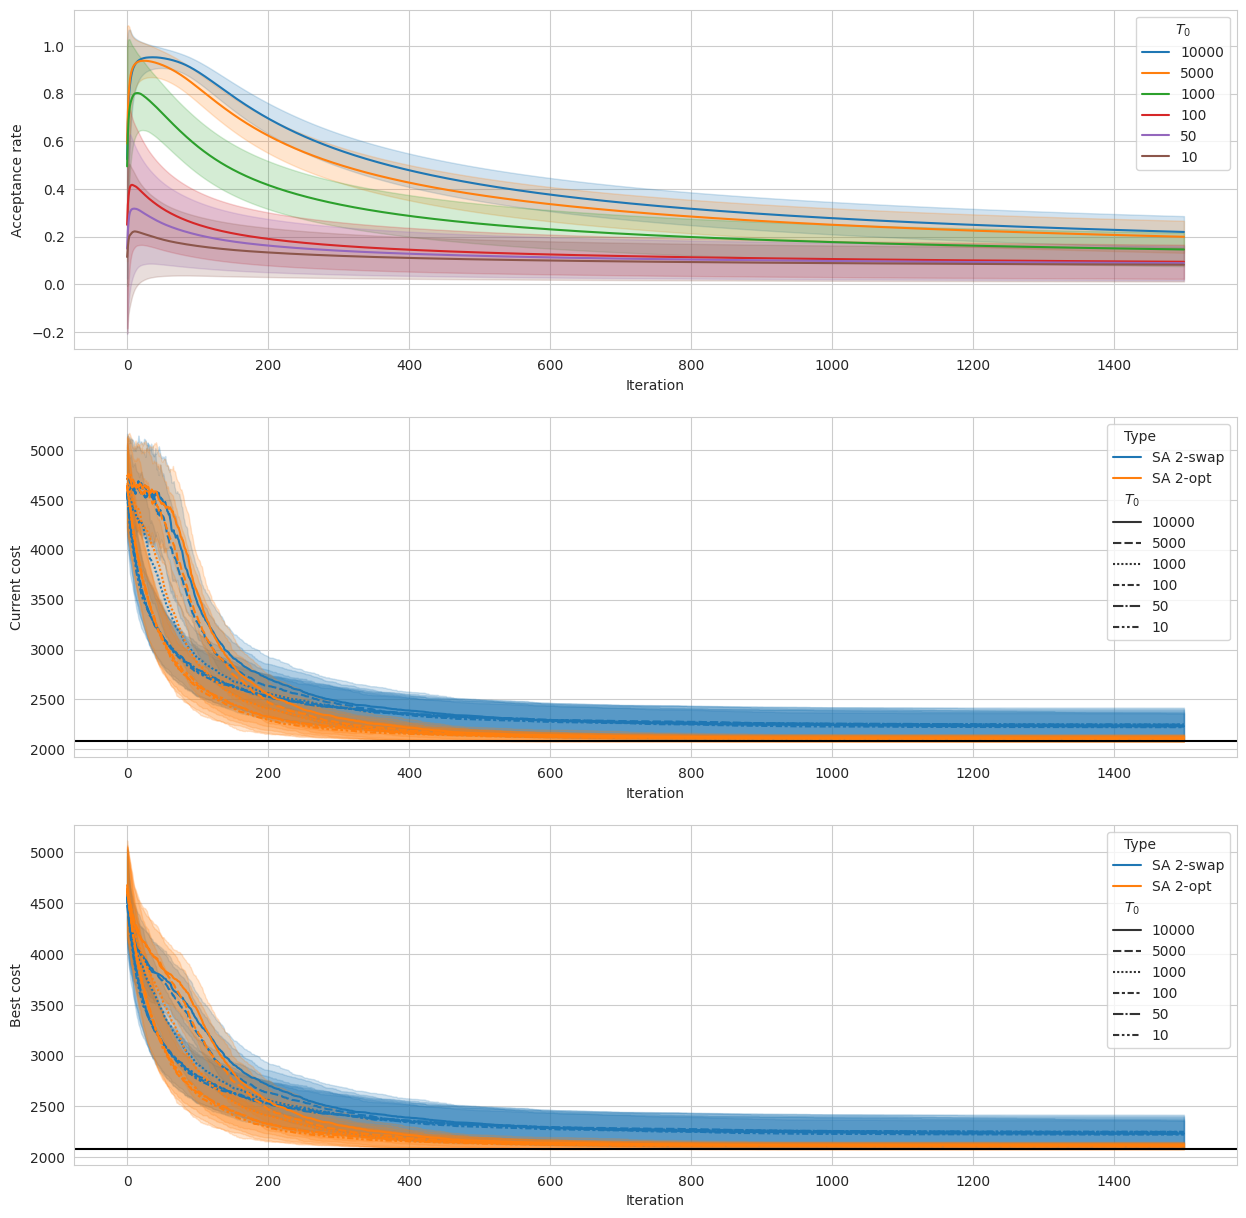

In [9]:
gr17_fig, _ = plot(gr17_df, 2085)
gr17_fig.savefig("../images/gr17_sa", dpi=600, bbox_inches="tight")

/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

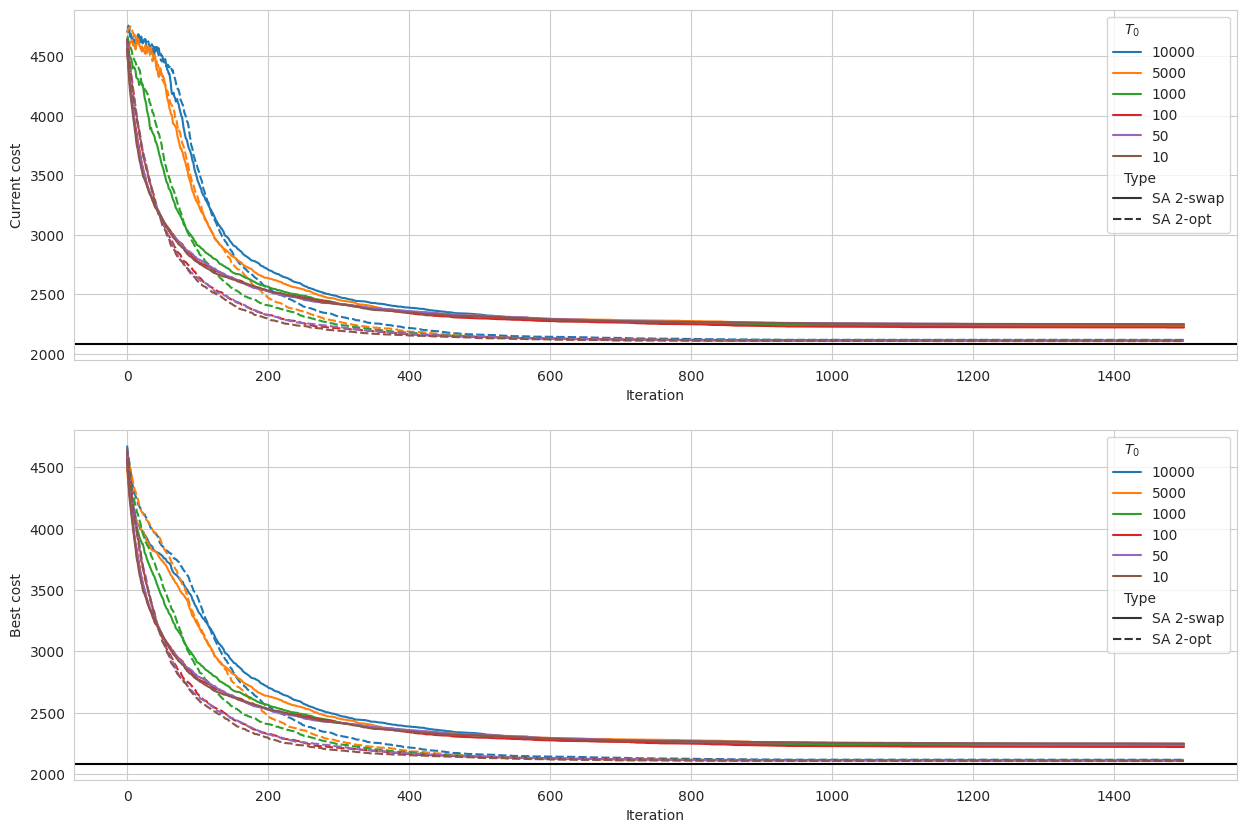

In [10]:
gr17_ne, _ = plot_wo_error(gr17_df, 2085)
gr17_ne.savefig("../images/gr17-no-error.png", dpi=600, bbox_inches="tight")

/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

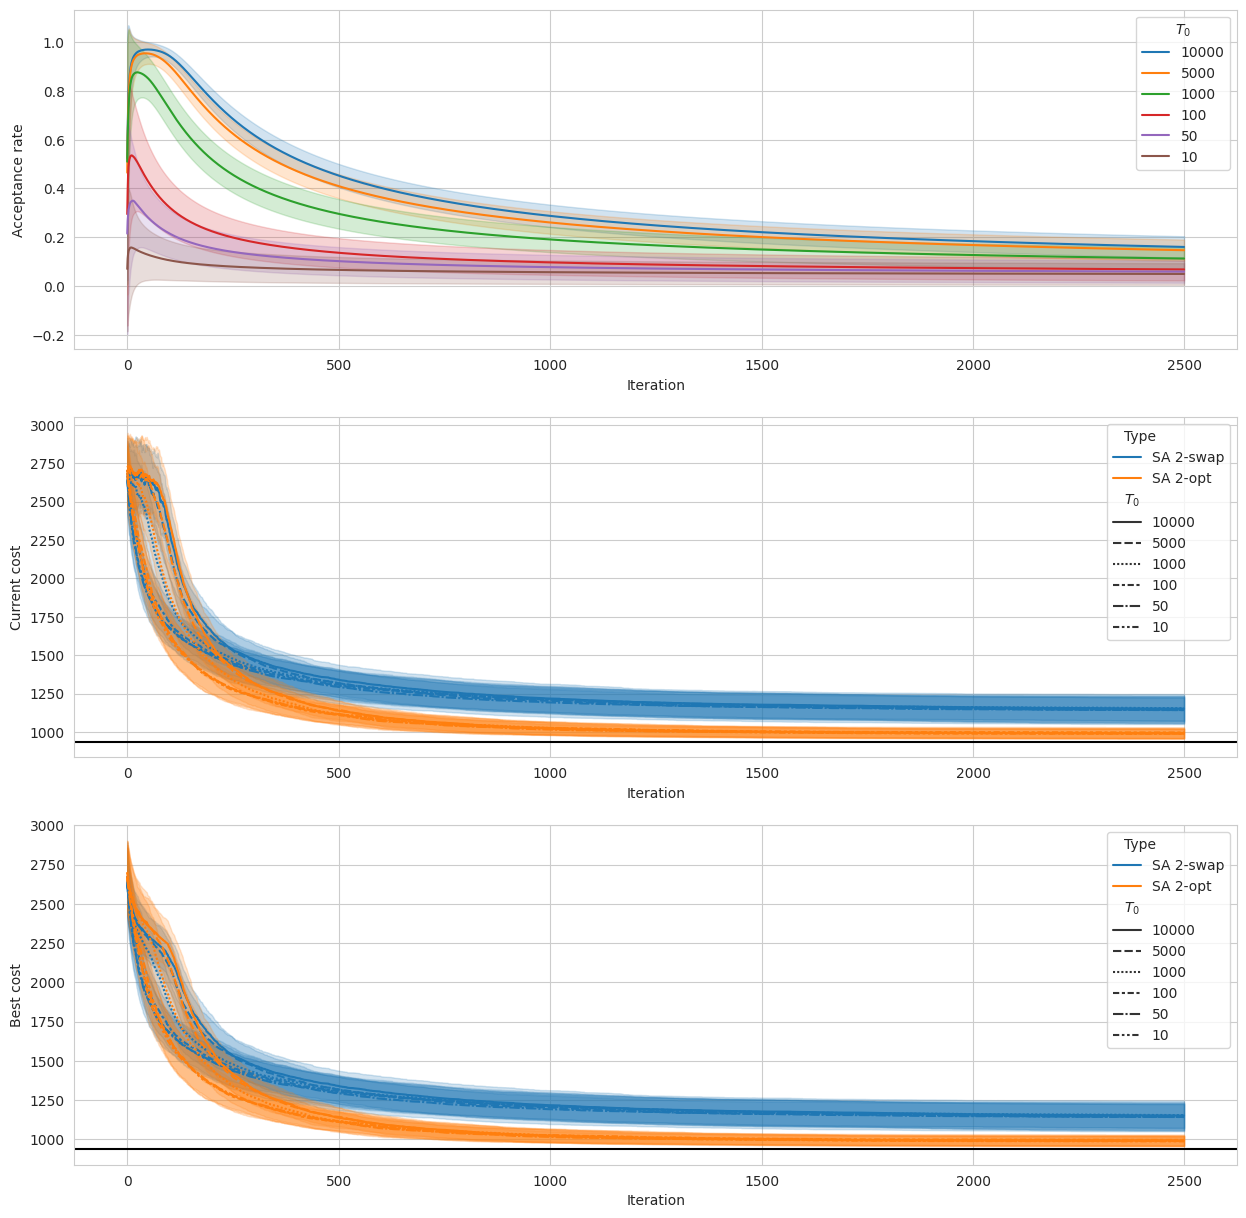

In [11]:
fri26_fig, _ = plot(fri26_df, 937)
fri26_fig.savefig("../images/fri26_sa", dpi=600, bbox_inches="tight")

/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

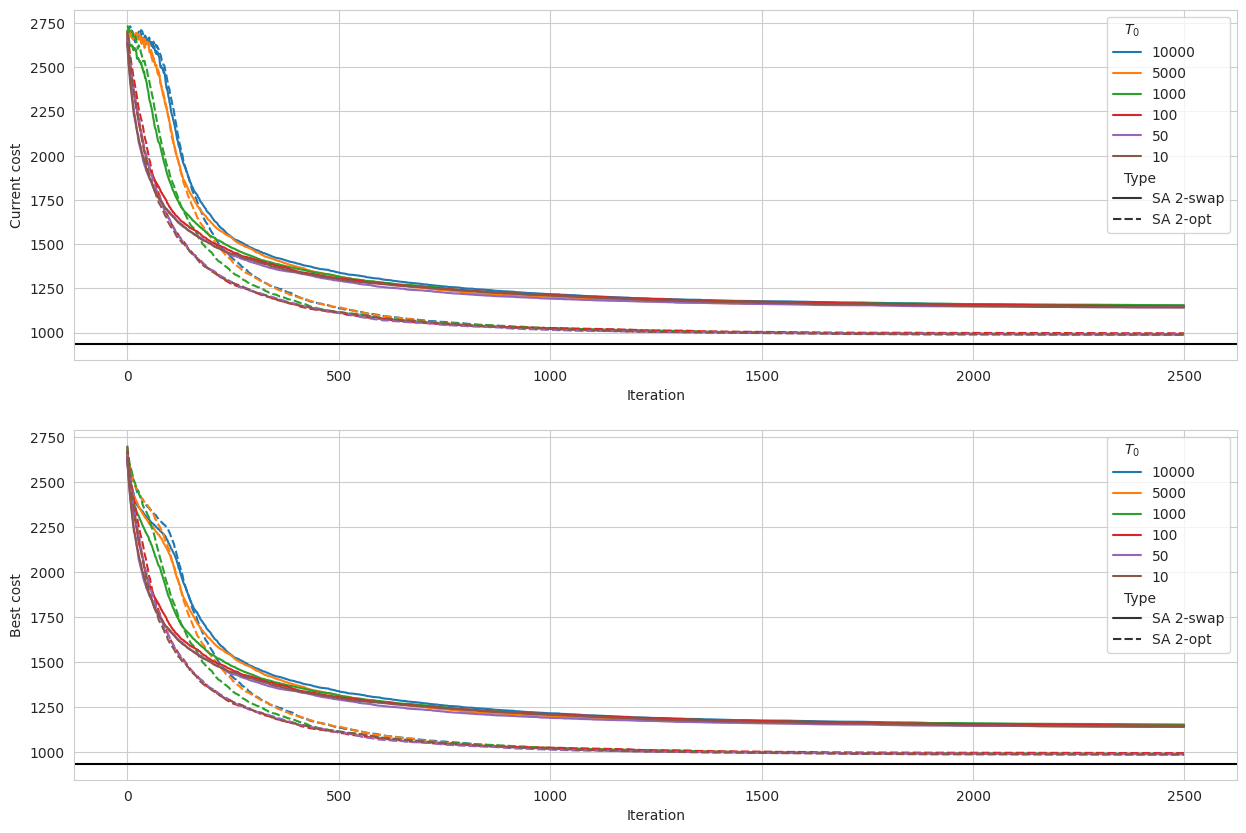

In [12]:
fri26_ne, _ = plot_wo_error(fri26_df, 937)
fri26_ne.savefig("../images/fri26-no-error.png", dpi=600, bbox_inches="tight")

/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

CPU times: user 1min 23s, sys: 1.41 s, total: 1min 24s
Wall time: 1min 24s


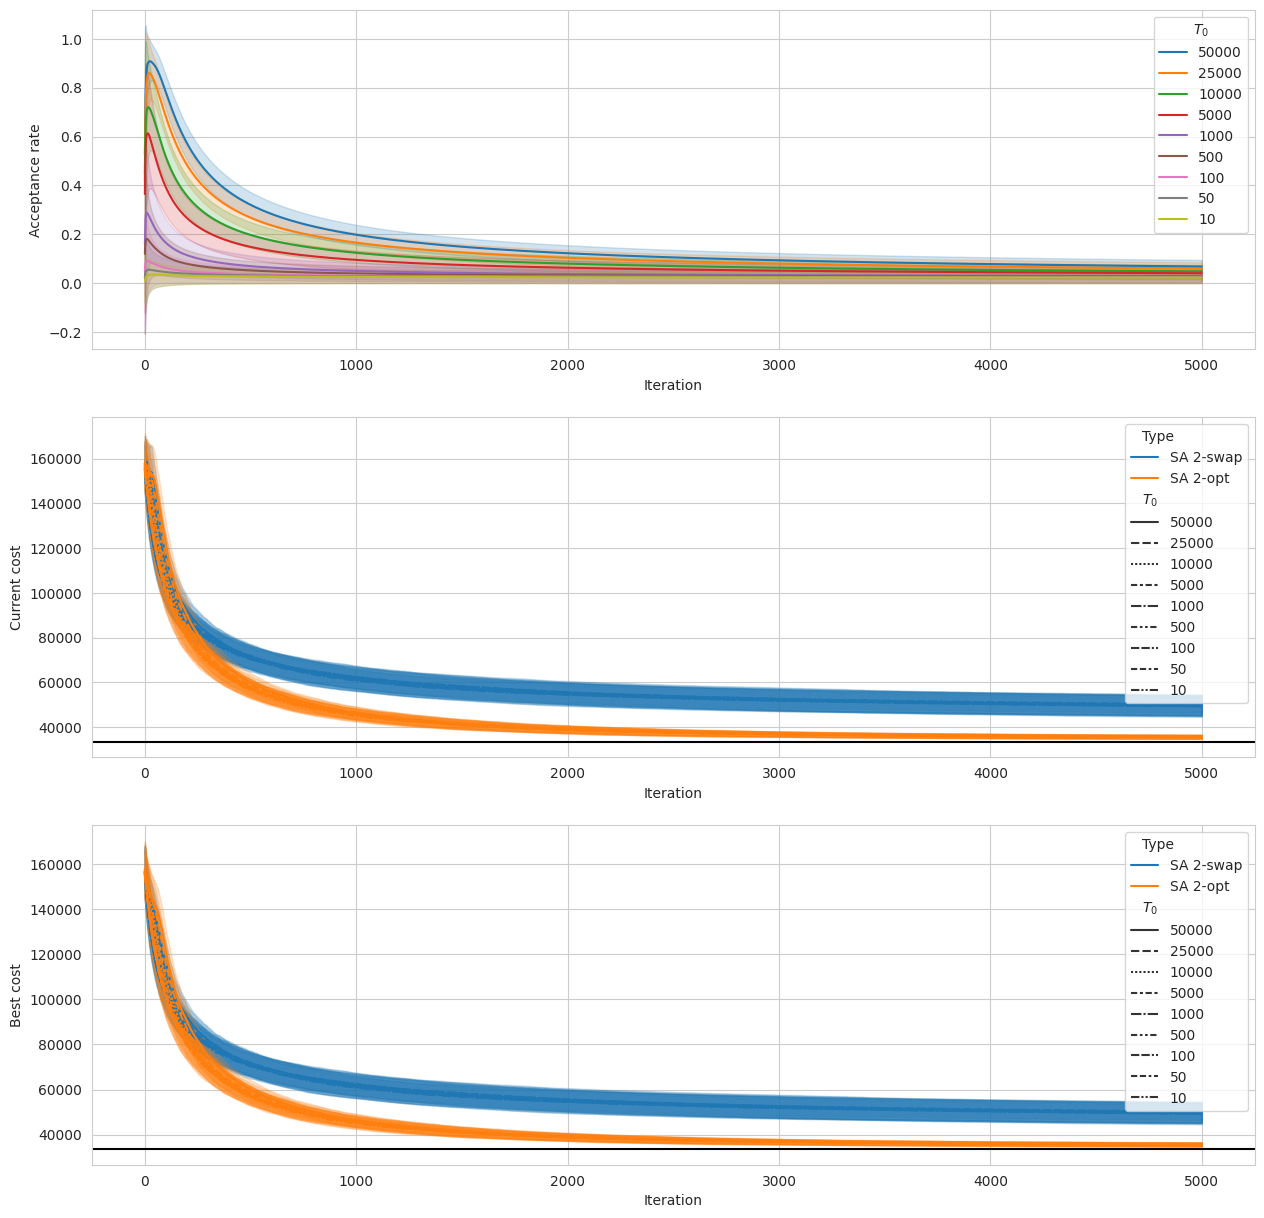

In [13]:
%%time
att48_fig, _ = plot(att48_df, 33523)
att48_fig.savefig("../images/att48_sa", dpi=600, bbox_inches="tight")

/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

CPU times: user 57.2 s, sys: 849 ms, total: 58 s
Wall time: 57.7 s


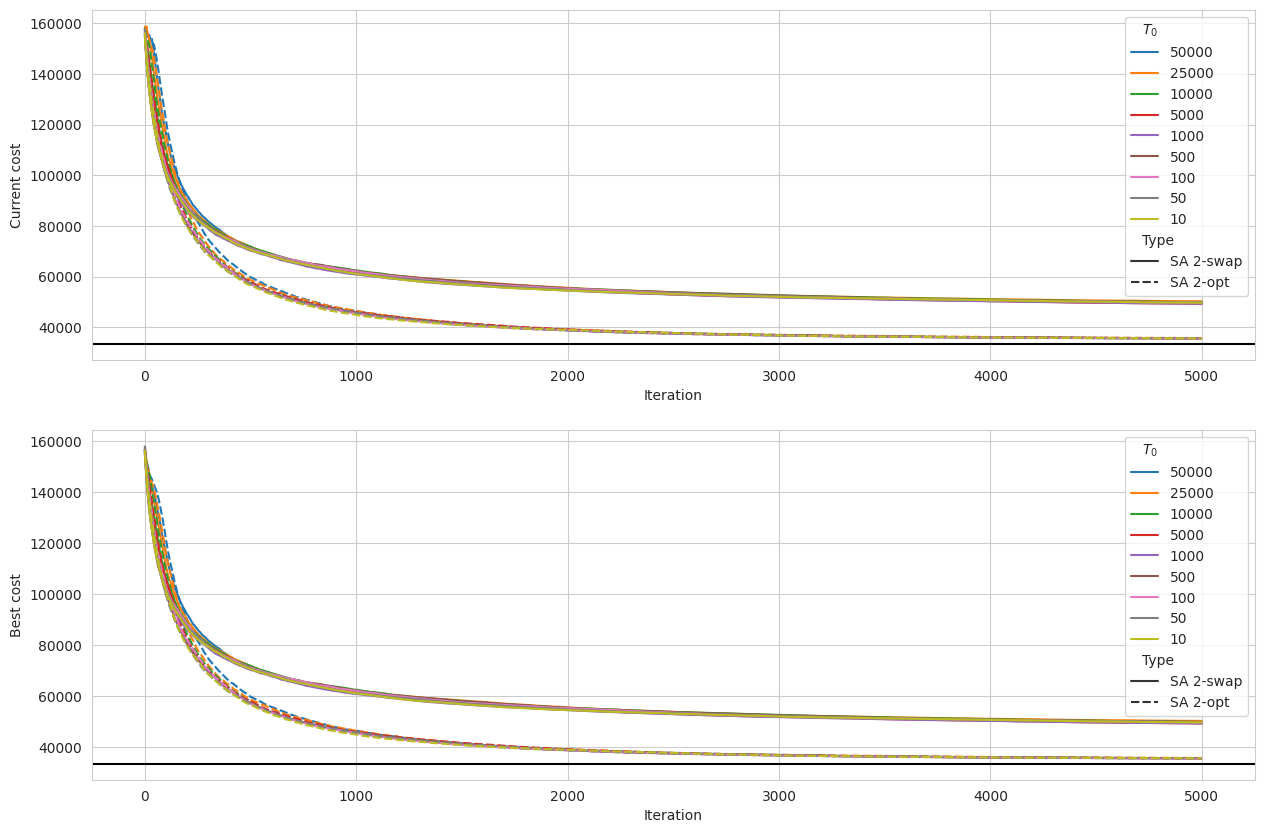

In [14]:
%%time
att48_ne, _ = plot_wo_error(att48_df, 33523)
att48_ne.savefig("../images/att48-no-error.png", dpi=600, bbox_inches="tight")

# Comparison with Hill Climbing

In [15]:
hc_gr17 = pd.read_csv("~/muic/ma395_heuristic/homework/hw1/results/gr17.csv")
hc_fri26 = pd.read_csv("~/muic/ma395_heuristic/homework/hw1/results/fri26.csv")
hc_att48 = pd.read_csv("~/muic/ma395_heuristic/homework/hw1/results/att48.csv")

sa_gr17 = pd.read_csv("results/sa_gr17.csv")
sa_fri26 = pd.read_csv("results/sa_fri26.csv")
sa_att48 = pd.read_csv("results/sa_att48.csv")

In [16]:
gr17 = pd.concat([sa_gr17[sa_gr17["$T_0$"] == 100], hc_gr17]) \
    .drop(["Current cost", "Acceptance rate", "Trial"], axis=1)
fri26 = pd.concat([sa_fri26[sa_fri26["$T_0$"] == 100], hc_fri26]) \
    .drop(["Current cost", "Acceptance rate", "Trial"], axis=1)
att48 = pd.concat([sa_att48[sa_att48["$T_0$"] == 100], hc_att48]) \
    .drop(["Current cost", "Acceptance rate", "Trial"], axis=1)

/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

CPU times: user 1min 19s, sys: 316 ms, total: 1min 19s
Wall time: 1min 19s


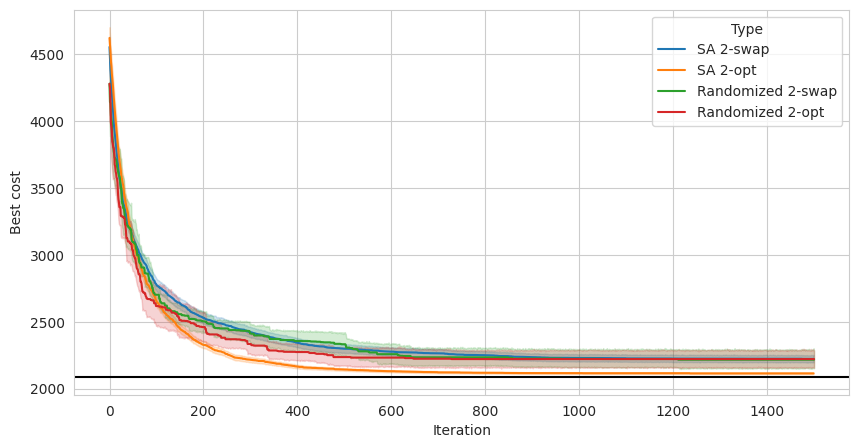

In [17]:
%%time
plt.figure(figsize=(10, 5))
plt.axhline(2085, color="black")
sns.lineplot(gr17, x="Iteration", y="Best cost", hue="Type")
plt.savefig("../images/gr17-with-hc.png", dpi=600, bbox_inches="tight")

/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

CPU times: user 2min 15s, sys: 372 ms, total: 2min 16s
Wall time: 2min 15s


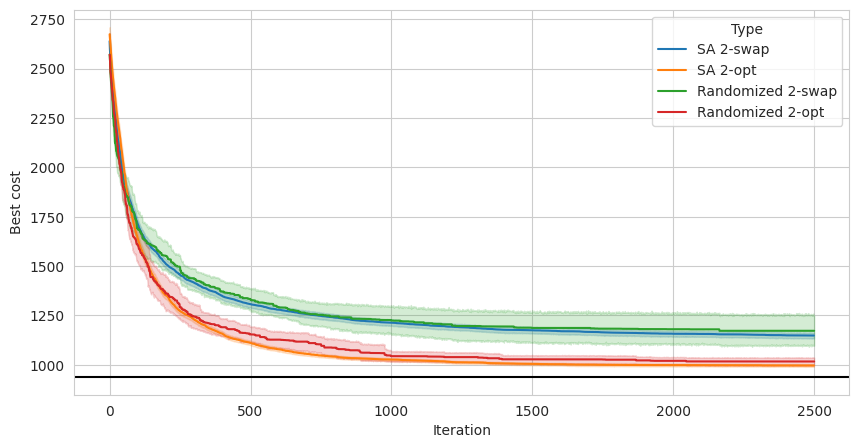

In [18]:
%%time
plt.figure(figsize=(10, 5))
plt.axhline(937, color="black")
sns.lineplot(fri26, x="Iteration", y="Best cost", hue="Type")
plt.savefig("../images/fri26-with-hc.png", dpi=600, bbox_inches="tight")

/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

CPU times: user 4min 24s, sys: 544 ms, total: 4min 24s
Wall time: 4min 24s


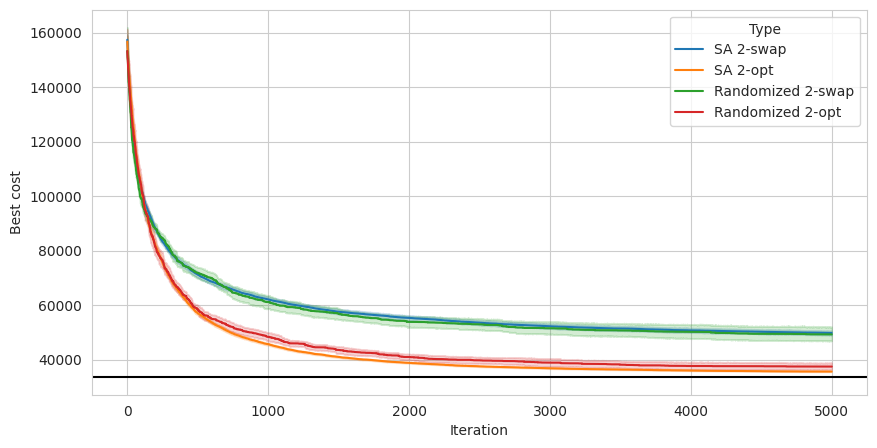

In [19]:
%%time
plt.figure(figsize=(10, 5))
plt.axhline(33523, color="black")
sns.lineplot(att48, x="Iteration", y="Best cost", hue="Type")
plt.savefig("../images/att48-with-hc.png", dpi=600, bbox_inches="tight")